# goal of notebook
- create dict for manual matching of editors
- test direct match(=alignment) and create a list to facilitate manual match with closest publisher candidates with Levenstein
- convert manual matches to v2 (because changed BTLF extraction from publisher to imprint)
    -> insert manual_match_v2 dict into ExtractionGraphBTLF
- **user will fill manual_match_v2 manually according to output of levenstein**
- use again if editors change a lot and need to match again OR adding a new source

# prerequisite
- duplicate_publisher_elimination_BNF_Constellations.ipynb

# output
- manual_matches_v2 to copy in ExtractionGrapheBTLF.ipynb

In [2]:
from rdflib import Graph, RDF, URIRef
import rdflib
import sys
sys.path.append('../')

sys.path.append('../andre')
import andre.utils as utils
from andre.utils import schema as SCHEMA
import collections

# editor alignment BLTF/ BNF_Constellations

In [3]:
publishers_btlf_graph = Graph()
publishers_btlf_graph.bind("schema","http://schema.org/", override=True, replace=True)
publishers_btlf_graph.parse("../final_datasets/btlf_books/Graphes/grapheEditeurs_new_data_Imprint_andre.ttl")
print(len(list(publishers_btlf_graph.subjects(RDF.type, SCHEMA.Publisher))))



publishers_bnf_constellations_graph = Graph()
publishers_bnf_constellations_graph.bind("schema","http://schema.org/", override=True, replace=True)
publishers_bnf_constellations_graph.parse("../final_datasets/intermediary_files/publisher_BNF_Constellation_Babelio_NoDuplicate.ttl")
len(list(publishers_bnf_constellations_graph.subjects(RDF.type, SCHEMA.Publisher)))

1046


2222

In [4]:
import Levenshtein

def find_top_x_similar_strings_levenshtein(string_list, target_string, top_x=5):
    distances = []
    for string in string_list:
        distance = Levenshtein.distance(string, target_string)
        if distance <= 8:
            distances.append((string, distance))
    distances.sort(key=lambda x: x[1])
    if distances:
         return distances[:top_x]
    else: 
        return None

In [5]:
publishers_bnf_constellations_dict = {}

for publisher in publishers_bnf_constellations_graph.subjects(RDF.type, SCHEMA.Publisher):
    raw_name = str(publishers_bnf_constellations_graph.value(publisher, SCHEMA.name))
    preprocessed_name = utils.preprocess_publisher_name(raw_name)
    
    if preprocessed_name not in publishers_bnf_constellations_dict.keys(): # don't add doublons
        # doublons[preprocessed_name]+= publisher
        publishers_bnf_constellations_dict[preprocessed_name] = utils.Publisher(source="bnf_constellations", 
                                                                        uri=publisher, 
                                                                        raw_name=raw_name, 
                                                                        preprocessed_name=preprocessed_name)
    else:
        print("duplicate found: check source file or eliminate")

In [6]:
len(publishers_btlf_graph)

2092

# manual matches conversion from v1 to v2 
####  v1 (key = raw_name_bltf, value = uri_bnf_constellations) 
#### v2 (key = raw_name_btlf, value = raw_name_bnf_constellations)
## reason for change: uri_bnf_constellation depends on raw_name_bnf_constellations

In [7]:
def find_raw_name_by_uri(target_uri):
    for preprocessed_name in publishers_bnf_constellations_dict.keys():
        uri = publishers_bnf_constellations_dict[preprocessed_name].uri.replace("http://schema.org/", "")
        if uri == target_uri:
            return publishers_bnf_constellations_dict[preprocessed_name].raw_name
    return "not found"

In [8]:
find_raw_name_by_uri("Gulf_Stream")

'Gulf Stream'

In [9]:
manual_matches = {"Gulf Stream (Editions du)": "Gulf_Stream", 
                  "Magnard-Vuibert": "Magnard",
                  "Musée du Louvre": "MuseduLouvred",
                 "Soleil productions": "Soleilproduction",
                 "Editions Ouest-France-Edilarge": "OuestFrance",
                 "Plume de carotte": "Plumecarotte",
                 "Editions Dadoclem": "Dadoclemd",
                 "Jean-Claude Gawsewitch éditeur": "JCGawsewitch",
                 "Editions de L'Archipel": "LArchipel",
                 "Odile Jacob": "OJacob",
                 "Editions du Centre Pompidou": "CentrePompidou",
                 "Musées de la ville de Strasbourg": "lesMusesdelaVilledeStrasbourg",
                 "Lancosme multimédia": "Lancosmed",
                 "Critères": "Critresd",
                 "Quespire": "Quespired",
                 "Les éditions du Bonhomme vert": "leBonhommevert",
                 "Vengeur masqué": "Le_Vengeur_Masqué",
                 "Editions Ecole active": "Ecole_Active",
                 "Editions [MiC_MaC]": "MicMac",
                 "Eveil et découvertes": "Eveiletdcouverte",
                 "Editions des Grandes personnes": "Les_Grandes_Personnes",
                 "Editions-Diffusion Karthala": "Karthala",
                 "Les éditions Carpentier": "DCarpentier",
                 "Pascal Galodé éditeurs": "PGalod",
                 "Prisma Media": "Prisma",
                 "Art à la page": "lArtlapage",
                 "CERCIL": "duCercil",
                 "Les Editions de la Grande ourse": "La_Grande_Ourse",
                 "Editions de La Différence": "La_Différence",
                 "Tertium": "Tertiumd",
                 "Editions de la Renarde rouge": "La_Renarde_Rouge",
                 "Aniss éditions": "Anissd",
                 "Editions du Rouergue": "Rouergue",
                 "Les éditions du soleil de minuit": "Soleil_De_Minuit",
                 "Editions des Arènes": "Les_Arènes",
                 "Le Square éditeur": "leSquared",
                 "Griffon bleu": "leGriffonbleu",
                 "Les éditions du Kilowatt": "Kilowatt",
                 "Ophelbe": "Ofelbe",
                 "Editions Privat SAS": "Privat",
                 "Losange": "duLosange",
                 "Les Editions Sandawe": "Sandawecom",
                 "Nouvelles éditions ivoiriennes": "NEINouvellesditionsIvoiriennes",
                 "Studio des Trois Becs": "StudiolesTroisBecs",
                 "Editions Imago": "AuzasditeursImago",
                 "205 Corp": "205fr",
                 "Librairie Téqui (Pierre)": "Téqui",
                 "Editions de la Coopérative": "laCooprative",
                 "Les Productions Somme toute": "Somme_toute",
                 "Réseau Canopé": "Canopditions",
                 "Editions Maelström": "maelstrmreEvolution",
                 "Le Dilettante": "Le_dilletante",
                 "Les Editions de Minuit": "Minuit",
                 "Editions Jean-Paul Gisserot": "JPGisserot",
                 "Les éditions du dernier havre": "Le_dernier_havre",
                 "Éditions du Septentrion": "Septentrion",
                 "Orca Book Publishing": "Orca",
                 "LéR - Les éditeurs réunis": "Les_Éditeurs_Réunis",
                 "Presses de l'Université de Montréal": "Les_Presses_De_Luniversité_De_Montréal",
                 "Éditions du Noroit": "Le_Noroît",
                 "Editions de Fallois": "Fallois",
                 "6 pieds sous terre éditions": "Six_Pieds_Sous_Terre",
                 "Editions du Triomphe": "Triomphe",
                 "Éditions du Vermillon": "Vermillon",
                 "Éditions ADA inc.": "AdA",
                 "Homme sans nom (Editions de l')": "LHomme_Sans_Nom",
                 "Editions des Mille saisons": "Mille_Saisons",
                 "Vincze (Eva)": "Vincze",
                 "Edizioni Corraini": "Corraini",
                 "Editions Picquier (Philippe)": "PPicquier",
                 "Ed. de l'Homme sans nom":"LHomme_Sans_Nom",
                 "Jaguar":"duJaguar",
                 "Palissade":"La_Palissade",
                 "Note de partage":"uneNotedepartage",
                 "Privat SAS": "Privat",
                 "Marmaille et compagnie":"Marmaillecompagnie",
                 "Alain Gorius": "alManarAGorius",
                 "Harmattan Guinée": "lHarmattanGuine",
                 "les Ed. Ago": "AGO",
                 "Louvre éditions": "MuseduLouvred",
                 "Calicot": "leCalicot",
                 "Aventuriers de l'étrange": "lesAventuriersdeltrange",
                 "Revue dessinée":"LaRevuedessine",
                 "Diplodocus": "leDiplodocus",
                 "Nouv. éd. ivoiriennes":"NEINouvellesditionsIvoiriennes",
                 "Museum d'histoire naturelle": "Musumnationaldhistoirenaturelle",
                 "Musée cantonal des beaux-arts de Lausanne": "MusedesbeauxartsdeLausanne",
                 "Editions Deux-Cent-Cinq": "205fr",
                 "Inédite": "lIndite",
                 }

In [10]:
manual_matches_v2 = {}
for match_key in manual_matches:
    manual_matches_v2[match_key] = find_raw_name_by_uri(manual_matches[match_key])
manual_matches_v2

{'Gulf Stream (Editions du)': 'Gulf Stream',
 'Magnard-Vuibert': 'Magnard',
 'Musée du Louvre': 'Musée du Louvre éd.',
 'Soleil productions': 'Soleil production',
 'Editions Ouest-France-Edilarge': 'Ouest-France',
 'Plume de carotte': 'Plume carotte',
 'Editions Dadoclem': 'Dadoclem éd.',
 'Jean-Claude Gawsewitch éditeur': 'J.-C. Gawsewitch',
 "Editions de L'Archipel": "L'Archipel",
 'Odile Jacob': 'O. Jacob',
 'Editions du Centre Pompidou': 'Centre Pompidou',
 'Musées de la ville de Strasbourg': 'les Musées de la Ville de Strasbourg',
 'Lancosme multimédia': 'Lancosme éd.',
 'Critères': 'Critères éd.',
 'Quespire': 'Quespire éd.',
 'Les éditions du Bonhomme vert': 'le Bonhomme vert',
 'Vengeur masqué': 'Le Vengeur Masqué',
 'Editions Ecole active': "L'École active",
 'Editions [MiC_MaC]': 'Mic-Mac',
 'Eveil et découvertes': 'Eveil et découverte',
 'Editions des Grandes personnes': 'Les Grandes Personnes',
 'Editions-Diffusion Karthala': 'Karthala',
 'Les éditions Carpentier': 'D. Carp

# todo: update manual_matches_v2 manually if recompilation of editor alignment

In [11]:
manual_matches_v2 = {
'Gulf Stream (Editions du)': 
   'Gulf Stream',
'Magnard-Vuibert': 
   'Magnard',
'Musée du Louvre': 
   'Musée du Louvre éd.',
'Soleil productions': 
   'Soleil production',
'Editions Ouest-France-Edilarge': 
   'Ouest-France',
'Plume de carotte': 
   'Plume carotte',
'Editions Dadoclem': 
   'Dadoclem éd.',
'Jean-Claude Gawsewitch éditeur': 
   'J.-C. Gawsewitch',
"Editions de L'Archipel": 
   "L'Archipel",
'Odile Jacob': 
   'O. Jacob',
'Editions du Centre Pompidou': 
   'Centre Pompidou',
'Musées de la ville de Strasbourg': 
   'les Musées de la Ville de Strasbourg',
'Lancosme multimédia': 
   'Lancosme éd.',
'Critères': 
   'Critères éd.',
'Quespire': 
   'Quespire éd.',
'Les éditions du Bonhomme vert': 
   'le Bonhomme vert',
'Vengeur masqué': 
   'Le Vengeur Masqué',
'Editions Ecole active': 
   "L'École active",
'Editions [MiC_MaC]': 
   'Mic-Mac',
'Eveil et découvertes': 
   'Eveil et découverte',
'Editions des Grandes personnes': 
   'Les Grandes Personnes',
'Editions-Diffusion Karthala': 
   'Karthala',
'Les éditions Carpentier': 
   'D. Carpentier',
'Pascal Galodé éditeurs': 
   'P. Galodé',
'Prisma Media': 
   'Prisma',
'Art à la page': 
   "l'Art à la page",
'CERCIL': 
   'du Cercil',
'Les Editions de la Grande ourse': 
   'La Grande Ourse',
'Editions de La Différence': 
   'La Différence',
'Tertium': 
   'Tertium éd.',
'Editions de la Renarde rouge': 
   'La Renarde Rouge',
'Aniss éditions': 
   'Aniss éd.',
'Editions du Rouergue': 
   'Rouergue',
'Les éditions du soleil de minuit': 
   'Soleil De Minuit',
'Editions des Arènes': 
   'Les Arènes',
'Le Square éditeur': 
   'le Square éd.',
'Griffon bleu': 
   'le Griffon bleu',
'Les éditions du Kilowatt': 
   'Kilowatt',
'Ophelbe': 
   'Ofelbe',
'Editions Privat SAS': 
   'Privat',
'Losange': 
   'du Losange',
'Les Editions Sandawe': 
   'Sandawe.com',
'Nouvelles éditions ivoiriennes': 
   'NEI - Nouvelles éditions Ivoiriennes',
'Studio des Trois Becs': 
   'Studio les Trois Becs',
'Editions Imago': 
   'Auzas éditeurs-Imago',
'205 Corp': 
   '205.fr',
'Librairie Téqui (Pierre)': 
   'Téqui',
'Editions de la Coopérative': 
   'la Coopérative',
'Les Productions Somme toute': 
   'Somme toute',
'Réseau Canopé': 
   'Canopé éditions',
'Editions Maelström': 
   'maelstrÖm reEvolution',
'Le Dilettante': 
   'Le dilletante',
'Les Editions de Minuit': 
   'Minuit',
'Editions Jean-Paul Gisserot': 
   'J.-P. Gisserot',
'Les éditions du dernier havre': 
   'Le dernier havre',
'Éditions du Septentrion': 
   'Septentrion',
'Orca Book Publishing': 
   'Orca',
'LéR - Les éditeurs réunis': 
   'Les Éditeurs Réunis',
"Presses de l'Université de Montréal": 
   'Les Presses De L’université De Montréal',
'Éditions du Noroit': 
   'Le Noroît',
'Editions de Fallois': 
   'Fallois',
'6 pieds sous terre éditions': 
   'Six Pieds Sous Terre',
'Editions du Triomphe': 
   'Triomphe',
'Éditions du Vermillon': 
   'Vermillon',
'Éditions ADA inc.': 
   'AdA',
"Homme sans nom (Editions de l')": 
   "L'Homme Sans Nom",
'Editions des Mille saisons': 
   'Mille Saisons',
'Vincze (Eva)': 
   'É. Vincze',
'Edizioni Corraini': 
   'Corraini',
'Editions Picquier (Philippe)': 
   'P. Picquier',
"Ed. de l'Homme sans nom": 
   "L'Homme Sans Nom",
'Jaguar': 
   'du Jaguar',
'Palissade': 
   'La Palissade',
'Note de partage': 
   'une Note de partage',
'Privat SAS': 
   'Privat',
'Marmaille et compagnie': 
   'Marmaille & compagnie',
'Alain Gorius': 
   'al Manar-A. Gorius',
'Harmattan Guinée': 
   "l'Harmattan Guinée",
'les Ed. Ago': 
   'AGO',
'Louvre éditions': 
   'Musée du Louvre éd.',
'Calicot': 
   'le Calicot',
"Aventuriers de l'étrange": 
   "les Aventuriers de l'étrange",
'Revue dessinée': 
   'La Revue dessinée',
'Diplodocus': 
   'le Diplodocus',
'Nouv. éd. ivoiriennes': 
   'NEI - Nouvelles éditions Ivoiriennes',
"Museum d'histoire naturelle": 
   "Muséum national d'histoire naturelle",
'Musée cantonal des beaux-arts de Lausanne': 
   'Musée des beaux-arts de Lausanne',
'Editions Deux-Cent-Cinq': 
   '205.fr',
'Inédite': 
   "l'Inédite",
"Néva éd.":"Neva",
"Ed. des Mille saisons": 
   "Mille Saisons",
"Sorbier":"Le Sorbier",
"Quadrants":"Quadrant",
"Rouge et or":"Rouge & Or",
"Nuée bleue": 
   "la Nuée bleue",
"Rocher": 
   "du Rocher",
"EP Emmanuel Proust éditions": 
   "Emmanuel Proust",
"Petit Lézard": 
   "Le Petit lézard",
"Afrobul":
   "Afro bulles éd.",
"Atalante": 
   "L'Atalante",
"Cherche Midi": 
   "Le Cherche Midi",
"Courrier du livre": "le Courrier du livre",
"Cité des sciences & de l'industrie":
   "Cité des sciences et de l'industrie",
"Ecole des loisirs":
   "L'École Des Loisirs",
"De La Martinière Jeunesse":
   "La Martinière Jeunesse",
"Temps apprivoisé":
   "le Temps apprivoisé",
"Archipel":
   "L'Archipel",
"Ecole active":
   "L'École active",
"Blake et Mortimer":
   "Blake & Mortimer",
"les Ed. du jardin des mots":
   "du Jardin des mots",
"M. Lafon": 
   "Michel Lafon",
"les Ed. du bonhomme vert":
   "le Bonhomme vert",
"Fond du Tiroir (Le)":
   "le Fond du tiroir",
"Ed. des Grandes personnes":
   "Les Grandes Personnes",
"Éditions de la Bagnole":
   "La Bagnole",
"les Ed. Fei":
   "Fei",
"Tulipe noire":
   "la Tulipe noire",
"Joie de lire":
   "La Joie De Lire",
"Temps des cerises":
   "le Temps des cerises",
"Orbestier":
   "d'Orbestier",
"Ed. de la Gouttière":
   "La Gouttière",
"Éditions Hurtubise inc.":
   "Hurtubise",
"Ed. de la Renarde rouge":
   "La Renarde Rouge",
"S. Diantantu":
   "Diantantu Editions",
"Arche éditeur":
   "L'Arche",
"Rocher jeunesse":
   "Le Rocher Jeunesse",
"Éditions de l'Isatis":
   "Isatis",
"Agrume":
   "L'Agrume",
"Petites moustaches éditions (Les)":
   "les Petites moustaches",
"Square éditeur":
   "le Square éd.",
"Cosmographe":
   "le Cosmographe",
"Harmattan Mali":
   "l'Harmattan Mali",
"Tropique édition":
   "Tropiques",
"Ed. du Centre Pompidou":
   "Centre Pompidou",
"Lattès":
   "JC Lattès",
"Atelier des Noyers":
   "l'Atelier des noyers",
"Lac aux Fées":
   "le lac aux fées",
"Le Robert":
   "Robert",
"Éditions du Phoenix":
   "Du Phœnix",
"Saint-Jean":
   "Guy Saint-Jean",
"Éditions du Trécarré":
   "Trécarré",
"Humanoïdes associés":
   "Les Humanoïdes Associés",
"Beech Street Books (French)":
   "Beech Street Books",
"Ed. de Fallois":
   "Fallois",
"Pré-aux-Clercs":
   "Le Pré Aux Clercs",
"Éditions de l'Hexagone":
   "L'Hexagone",
"6 pieds sous terre":
   "Six Pieds Sous Terre",
"Ed. de l'Olivier":
   "L'Olivier",
"éditions de la Bagnole":
   "La Bagnole",
"Sandawe":
   "Sandawe.com"
 }
 
direct_match_counter = 0
manual_match_counter = 0
levenstein_match_counter = 0
no_match_counter = 0
total_counter = 0

btlf_publishers_dict = {}
matches_dict = {}
non_matches_dict = {}
doublons_btlf = []
for publisher in publishers_btlf_graph.subjects(RDF.type, SCHEMA.Publisher):
    # print(publisher)
    total_counter += 1
    raw_name = str(publishers_btlf_graph.value(publisher, SCHEMA.name))
    preprocessed_name = utils.preprocess_publisher_name(raw_name)

    if preprocessed_name in btlf_publishers_dict.keys():
        doublons_btlf.append(preprocessed_name)
        
    btlf_publishers_dict[preprocessed_name] = utils.Publisher(source="btlf", 
                                                uri=publisher, 
                                                raw_name=raw_name, 
                                                preprocessed_name=preprocessed_name)

    if preprocessed_name in publishers_bnf_constellations_dict.keys():
        direct_match_counter +=1
        # print(preprocessed_name)
        matches_dict[preprocessed_name] = [btlf_publishers_dict[preprocessed_name], publishers_bnf_constellations_dict[preprocessed_name]]
    elif raw_name in manual_matches_v2.keys(): # don't change graph
        # but: avoir uri du truc matché
        manual_match_counter += 1
        matched_raw_name = manual_matches_v2[raw_name]
        # print(raw_name, "->", matched_uri)
        # print(SCHEMA[matched_uri])
        # print(find_preprocessed_name_by_uri(SCHEMA[matched_uri]))
    else:
        matched_key = find_top_x_similar_strings_levenshtein(publishers_bnf_constellations_dict.keys(), preprocessed_name)
       
        uri = raw_name.replace(' ', '_').replace("'", "").replace("&", "_").replace("/", "_").replace(".", "") # same name creation as Karim's script
        uri = URIRef(f'{SCHEMA}{uri}')
        non_matches_dict[raw_name] = uri

        no_match_counter += 1
        if matched_key:
            levenstein_match_counter += 1
            print("\""+ raw_name+ "\":")
            for key in matched_key:
                print("  ", "\""+ publishers_bnf_constellations_dict[key[0]].raw_name + "\",")
print()
print("direct", direct_match_counter, "/", len(btlf_publishers_dict.keys()))
print("manual", manual_match_counter, "/", len(btlf_publishers_dict.keys()))
print("no match", no_match_counter, "/", len(btlf_publishers_dict.keys()))
print("levenstein", levenstein_match_counter, "/", len(btlf_publishers_dict.keys()))
print("total counter", total_counter)
print("doublons counter", len(doublons_btlf))
print("total number of keys in dict", total_counter - len(doublons_btlf))
print("sum = ", direct_match_counter  + manual_match_counter + no_match_counter + levenstein_match_counter, "==", len(doublons_btlf) + len(btlf_publishers_dict.keys()))

"Sabine Wespieser éditeur":
   "Newest Press",
   "Signe De Piste",
"Buchet Chastel":
   "Tête haute",
   "la Cheminante",
   "Hachette",
   "Anna Chanel",
   "BdArtist(e)",
"Allia":
   "Al-Ahlia",
   "Alba",
   "Alias",
   "Arléa",
   "alif",
"Art global":
   "Alba",
   "Arléa",
   "Arola",
   "Art Lys",
   "Atlas",
"L. Pire":
   "Delpire",
   "Bir Publishing",
   "Circé",
   "Ekaré",
   "FFRE",
"Ogre":
   "FFRE",
   "Tigre & Cie",
   "Être Éditions",
   "ACR",
   "AGO",
"Libretto":
   "Librio",
   "Caurette",
   "Liber",
   "Libertad",
   "Lito",
"Noir sur blanc":
   "Flies France",
   "Goose Lane",
   "Insula",
   "Nouvelles Éditions De L'Arc",
   "Nuit Blanche",
"le Visage vert":
   "L'Élan Vert",
   "Le Figuier",
   "Le Sablier",
   "Les Arènes",
   "louis audibert",
"Emile & Feuille":
   "Millefeuille",
   "Grenouille",
   "Mille-îles",
   "Escabelle",
   "Lirabelle",
"Alter Comics":
   "AH Comics",
   "Bliss comics",
   "404 comics",
   "Alternatives",
   "DC Comics",
"Didier-Er

"Editions 404":
   "2024",
   "21g",
   "AAD",
   "ABS éd.",
   "ACR",
"LamaO éditions":
   "Calao",
   "LAHA éditions",
   "AAD",
   "AGO",
   "AdA",
"Moulinsart":
   "Mokand'Art",
   "FouLire",
   "Froissart",
   "Obriart",
   "Blizzard Publishing",
"Musée de l'homme":
   "Musée du Louvre éd.",
   "de l'Homme",
   "Musée Dapper",
   "Musée d'Orsay",
   "Musée du Québec",
"France-Info":
   "Urban China",
   "Chandeigne",
   "Dare-dare.info",
   "Fontaine",
   "France loisirs",
"Ensemble":
   "Constable",
   "Septembre",
   "ADEME",
   "Adèle",
   "Denoël",
"Dupuis Jeunesse":
   "Orphie jeunesse",
   "Seuil Jeunesse",
   "Atlas jeunesse",
   "Dagan jeunesse",
   "Ophrys jeunesse",
"Globe":
   "Librairie du Globe",
   "Alba",
   "Boje",
   "Clé",
   "Garae",
"Louison éditions":
   "Musson",
   "Tournon",
   "Christon éditions",
   "Clovis",
   "Flatiron",
"Hachette Enfants":
   "Hachette comics",
   "hachette deschamps",
   "Hachette éducation",
   "Rue des enfants",
   "Théâtrenfance",

In [12]:
print()
print("direct", direct_match_counter, "/", len(btlf_publishers_dict.keys()))
print("manual", manual_match_counter, "/", len(btlf_publishers_dict.keys()))
print("no match", no_match_counter, "/", len(btlf_publishers_dict.keys()))
print("levenstein", levenstein_match_counter, "/", len(btlf_publishers_dict.keys()))
print("total counter", total_counter)
print("doublons counter", len(doublons_btlf))
print("total number of keys in dict", total_counter - len(doublons_btlf))
print("sum = ", direct_match_counter  + manual_match_counter + no_match_counter + levenstein_match_counter, "==", len(doublons_btlf) + len(btlf_publishers_dict.keys()))


direct 760 / 1026
manual 89 / 1026
no match 197 / 1026
levenstein 166 / 1026
total counter 1046
doublons counter 20
total number of keys in dict 1026
sum =  1212 == 1046


In [13]:
doublons_btlf # not eliminated because very few duplicates

['lesallusifs',
 'les400coups',
 'delabagnole',
 'lemeac',
 'les400coups',
 'scholastic',
 'arte',
 'pierretisseyre',
 'scholastic',
 'marchanddefeuilles',
 'lesmalins',
 'nordsud',
 'xyz',
 'prisedeparole',
 'desplaines',
 'typo',
 'album',
 'lux',
 'ventsdouest',
 'hannenorak']

In [14]:
len(non_matches_dict)

197

In [15]:
non_matches_dict

{'Sabine Wespieser éditeur': rdflib.term.URIRef('http://schema.org/Sabine_Wespieser_éditeur'),
 'Buchet Chastel': rdflib.term.URIRef('http://schema.org/Buchet_Chastel'),
 'Allia': rdflib.term.URIRef('http://schema.org/Allia'),
 'Art global': rdflib.term.URIRef('http://schema.org/Art_global'),
 'L. Pire': rdflib.term.URIRef('http://schema.org/L_Pire'),
 'Ogre': rdflib.term.URIRef('http://schema.org/Ogre'),
 'Libretto': rdflib.term.URIRef('http://schema.org/Libretto'),
 'Noir sur blanc': rdflib.term.URIRef('http://schema.org/Noir_sur_blanc'),
 'le Visage vert': rdflib.term.URIRef('http://schema.org/le_Visage_vert'),
 'Emile & Feuille': rdflib.term.URIRef('http://schema.org/Emile___Feuille'),
 'Alter Comics': rdflib.term.URIRef('http://schema.org/Alter_Comics'),
 'Didier-Erudition': rdflib.term.URIRef('http://schema.org/Didier-Erudition'),
 '&#233;ditions Chouette': rdflib.term.URIRef('http://schema.org/_#233;ditions_Chouette'),
 "Les éditions d'Avallon": rdflib.term.URIRef('http://schema

In [16]:
graph_bnf = Graph()
graph_bnf.parse("final_datasets/bnf.ttl", format="turtle")

graph_btlf = Graph()
graph_btlf.parse("final_datasets/BTLF.ttl", format="turtle")

graph_constellations = Graph()
graph_constellations.parse("final_datasets/constellations.ttl", format="turtle")

graph_babelio = Graph()
graph_babelio.parse("final_datasets/babelio.ttl", format="turtle")

Failed to convert Literal lexical form to value. Datatype=http://www.w3.org/2001/XMLSchema#date, Converter=<function parse_date at 0x00000294A5B187C0>
Traceback (most recent call last):
  File "C:\Users\dre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\rdflib\term.py", line 2084, in _castLexicalToPython
    return conv_func(lexical)  # type: ignore[arg-type]
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\dre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\isodate\isodates.py", line 203, in parse_date
    raise ISO8601Error('Unrecognised ISO 8601 date format: %r' % datestring)
isodate.isoerror.ISO8601Error: Unrecognised ISO 8601 date format: 'Port- d-es'
Failed to convert Literal lexical form to value. Datatype=http://www.w3.org/2001/XMLSchema#date, Converter=<function parse_date at 0x00000294A5B187C0>
Traceback (most recent call last)

<Graph identifier=Nc8de204f88554c2086f2830e88bbc553 (<class 'rdflib.graph.Graph'>)>

Total number of non-matches in btlf: 601
[   ('Bayard_Canada_Livres', 115),
    ('Hachette_romans', 73),
    ('ERPI', 31),
    ('Doucey_éditions', 25),
    ('Hatier_jeunesse', 19),
    ('Amnesty_international_France', 18),
    ('Epsilon', 15),
    ('Bibliothèque_lecture_développement', 15),
    ('Dargaud-Jeunesse', 14),
    ('Delachaux_et_Niestlé_jeunesse', 13),
    ('Plon_jeunesse', 13),
    ('Éditions_MD', 12),
    ('Locus_solus_junior', 9),
    ('Urban_Link', 9),
    ('Syros_jeunesse', 8),
    ('Carabas_jeunesse', 8),
    ('Cauris_livres', 8),
    ('Héritage_jeunesse', 6),
    ('Dupuis_Jeunesse', 6),
    ('Editions_404', 6),
    ('Compagnie_du_réfectoire', 5),
    ('BBC_France', 5),
    ('Dare-Dare', 4),
    ('Hachette_Enfants', 4),
    ('Dexia_Ed', 4),
    ('Canopé-CRDP_de_lacadémie_dAix-Marseille', 4),
    ('Harmattan_Cameroun', 3),
    ('Galerie_Barbier___Mathon', 3),
    ('Ker_éditions', 3),
    ('Ed_du_sous-sol', 3),
    ('Château_de_Versailles', 3),
    ('Éditions_du_Parc_en_f

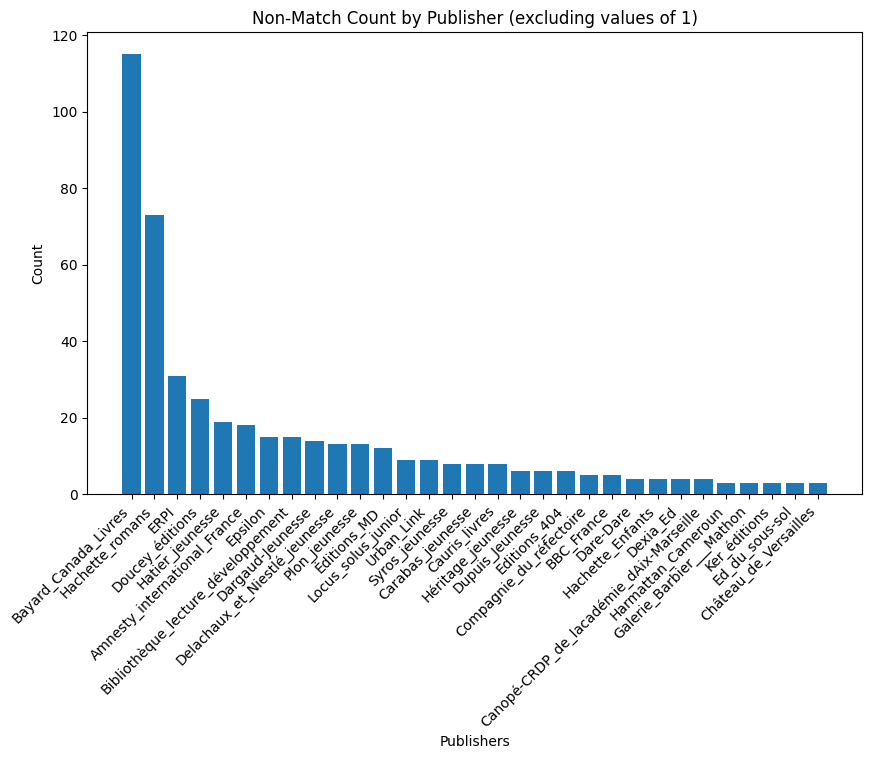

In [36]:
import pprint
import matplotlib.pyplot as plt

# non_match_dict = {'Éditions du Parc en face': rdflib.term.URIRef('http://schema.org/Éditions_du_Parc_en_face')}

def count_publishers_in_books(graph, source):
    publishers_array = []
    non_match_count_dict = collections.defaultdict(int)
    non_match_count = 0
    for book in graph.subjects(RDF.type, SCHEMA.Book):
        if source == "btlf":
            book_data = utils.extract_data_btlf(graph, book)
        elif source == "bnf":
            book_data = utils.extract_data_bnf(graph, book)
        elif source == "constellations":
            book_data = utils.extract_data_constellations(graph, book)
        elif source == "babelio":
            book_data = utils.extract_data_babelio(graph, book)
        
        publishers_array.append(URIRef(book_data.publisher))
    
    for publisher in publishers_array:
        if publisher in non_matches_dict.values():
            non_match_count_dict[publisher.replace(SCHEMA, '')] += 1
            non_match_count += 1
    
    # Filter the non_match_dict to exclude values of 1
    filtered_dict = {k: v for k, v in non_match_count_dict.items() if v > 2} # exclude publishers present 1 or 2 times in books

    # Sort the filtered_dict by value in descending order
    sorted_dict = dict(sorted(filtered_dict.items(), key=lambda item: item[1], reverse=True))

    # Extract the keys and values from the sorted_dict
    keys = sorted_dict.keys()
    values = sorted_dict.values()

    plt.figure(figsize=(10, 6))

    # Create the histogram plot
    plt.bar(keys, values)

    # Set the labels and title
    plt.xlabel('Publishers')
    plt.ylabel('Count')
    plt.title('Non-Match Count by Publisher (excluding values of 1)')

    plt.xticks(rotation=45, ha='right')

    print(f"Total number of non-matches in {source}: {non_match_count}")
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(sorted(non_match_count_dict.items(), key=lambda item: item[1], reverse=True))

# count_publishers_in_books(graph_constellations, "constellations") 
count_publishers_in_books(graph_btlf, "btlf") 
# count_publishers_in_books(graph_babelio, "babelio") 
# count_publishers_in_books(graph_bnf, "bnf") 